In [1]:
%load_ext autoreload
%autoreload 2
%reset

In [2]:
%matplotlib inline

## Repeatability Test

Test and develop dlist functions.

In [3]:
from pySurf.readers.instrumentReader import matrixdat_reader
import numpy as np
from pySurf.points import resample_grid, plot_points, level_points, points_autoresample
import os
from pySurf.data2D_class import Data2D
from dataIO.span import span
from matplotlib import pyplot as plt

<frozen importlib._bootstrap>:228: RuntimeWarning: numpy.ndarray size changed, may indicate binary incompatibility. Expected 88 from C header, got 96 from PyObject


In [4]:
from pySurf.scripts.dlist import dcouples_plot, plot_data_repeat
from plotting.backends import maximize
from plotting.multiplots import commonscale

VC 2022/12/22
Test di ripetibilita' e sensibilita' usando specchio di test da 100 mm di Pecchioli con alleggerimento.

01, 02, 03, 04 misura ripetuta a breve distanza senza toccare niente.

In [5]:
infolder = r"input_data\repeatability"
fl = sorted([f for f in os.listdir(infolder) if os.path.splitext(f)[-1] == '.dat'])

In [6]:
%matplotlib inline

In [7]:
plt.rcParams["figure.figsize"] = (16,11)

In [8]:
fl

['01_801B.dat', '02_801B.dat', '03_801B.dat', '04_801B.dat']

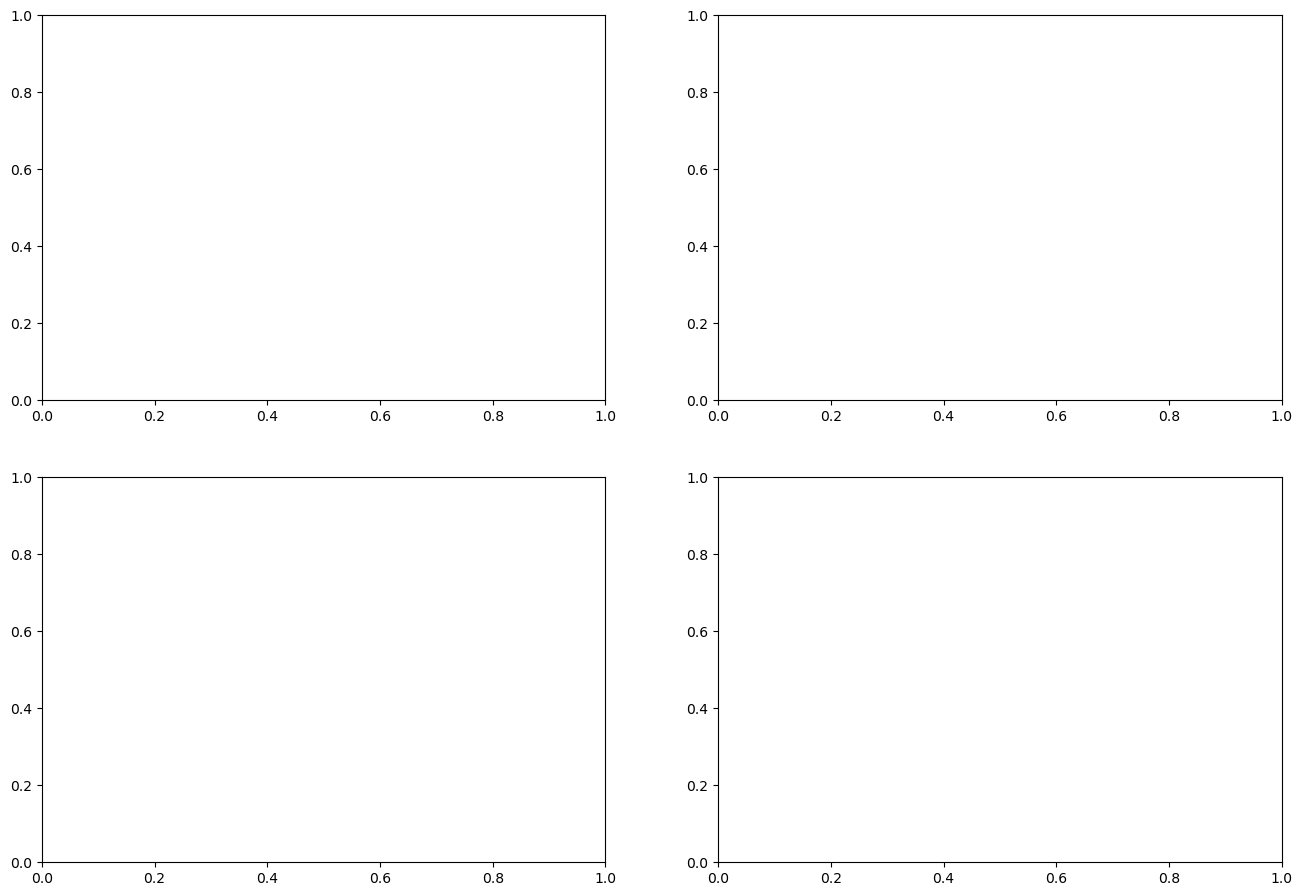

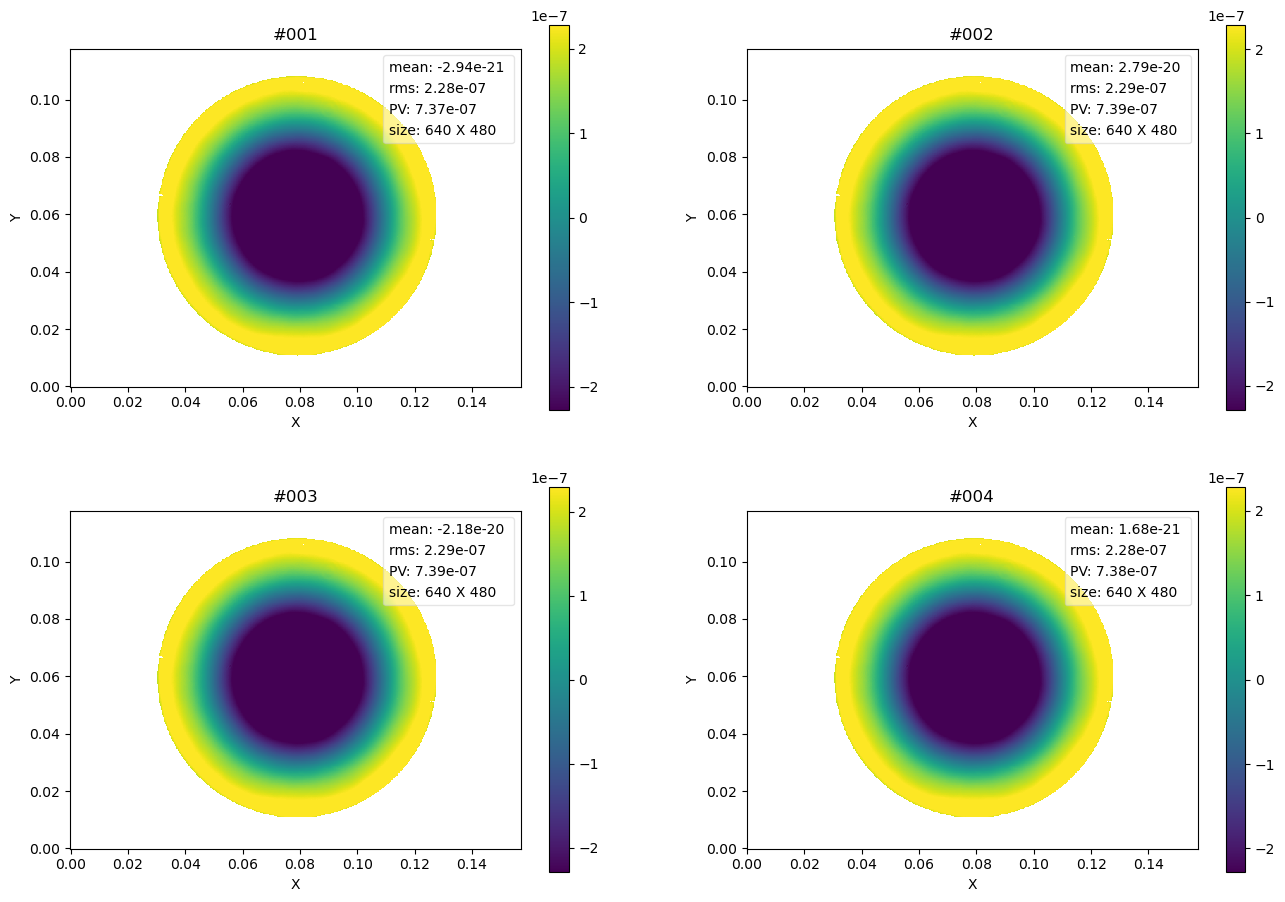

In [9]:
from pySurf.scripts.dlist import Dlist, load_dlist

dl = load_dlist([os.path.join(infolder,f) for f in fl],reader=matrixdat_reader, name = list('#%03i'%(a+1) for a in range(len(fl))))
dl.level().plot(type='grid',center = (0,0), strip=True)

In [10]:
# calculate all differences as Data2D. It is sufficient to plot these data with the correct structure and formatting.
import itertools
dcouples=[c[1]-c[0] for c in list(itertools.combinations(dl, 2))]
dcouples

[<.Data2D "#002 - #001" at 0x246b44608b0>,
 <.Data2D "#003 - #001" at 0x246b4fe4250>,
 <.Data2D "#004 - #001" at 0x246b5307460>,
 <.Data2D "#003 - #002" at 0x246b53073d0>,
 <.Data2D "#004 - #002" at 0x246b5307430>,
 <.Data2D "#004 - #003" at 0x246b5307490>]

Test different functions:

* `plot_data_repeat`
* `dcouples_plot`
* `compare_images`

<Figure size 1600x1100 with 0 Axes>

[2.2785232942074712e-07,
 2.287521107550717e-07,
 2.2923007049327793e-07,
 2.2824801228765258e-07]

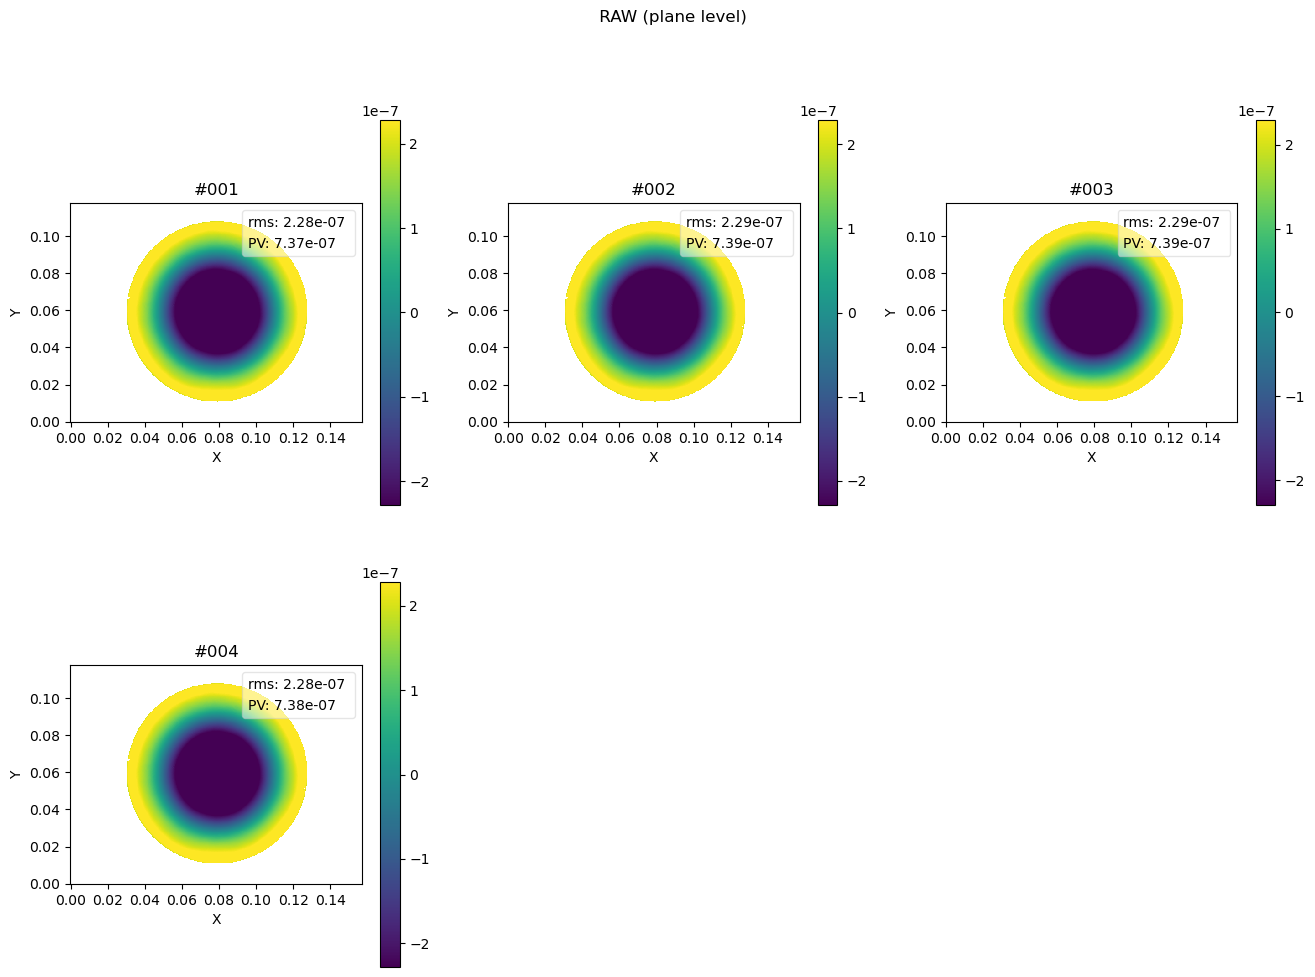

In [11]:
from pySurf.scripts.repeatability_dev import plot_cross_diff_rms
plot_data_repeat(dl.level())

<Figure size 1600x1100 with 0 Axes>

<Figure size 1600x1100 with 0 Axes>

[<.Data2D "#002 - #001" at 0x246b96b4130>,
 <.Data2D "#003 - #001" at 0x246b451bbb0>,
 <.Data2D "#004 - #001" at 0x246b460eeb0>,
 <.Data2D "#003 - #002" at 0x246b460e4c0>,
 <.Data2D "#004 - #002" at 0x246b460eaf0>,
 <.Data2D "#004 - #003" at 0x246b460ea90>]

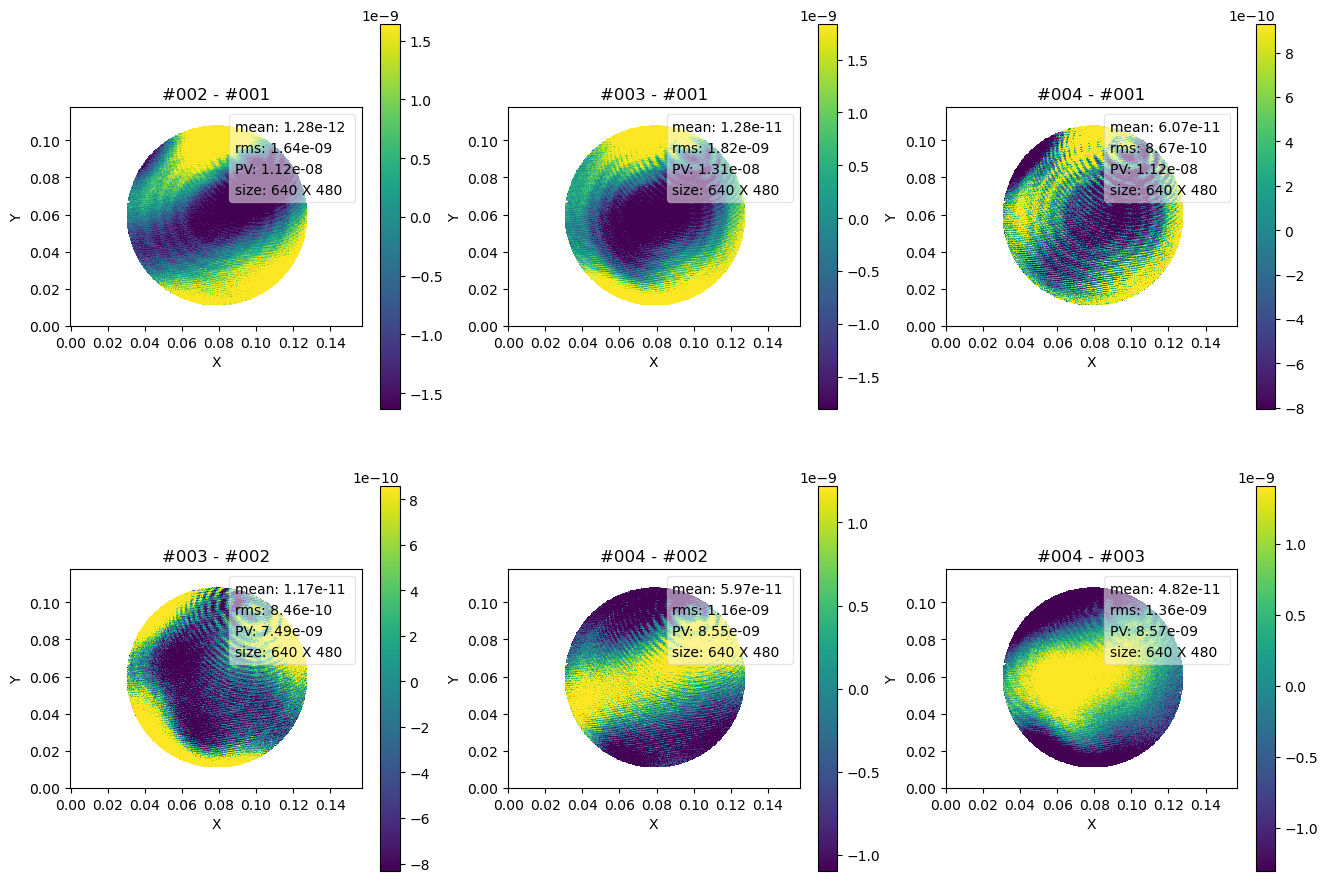

In [12]:
from pySurf.scripts.repeatability_dev import plot_rep_diff

dcouples_plot(dl.level())

In [12]:
%matplotlib inline

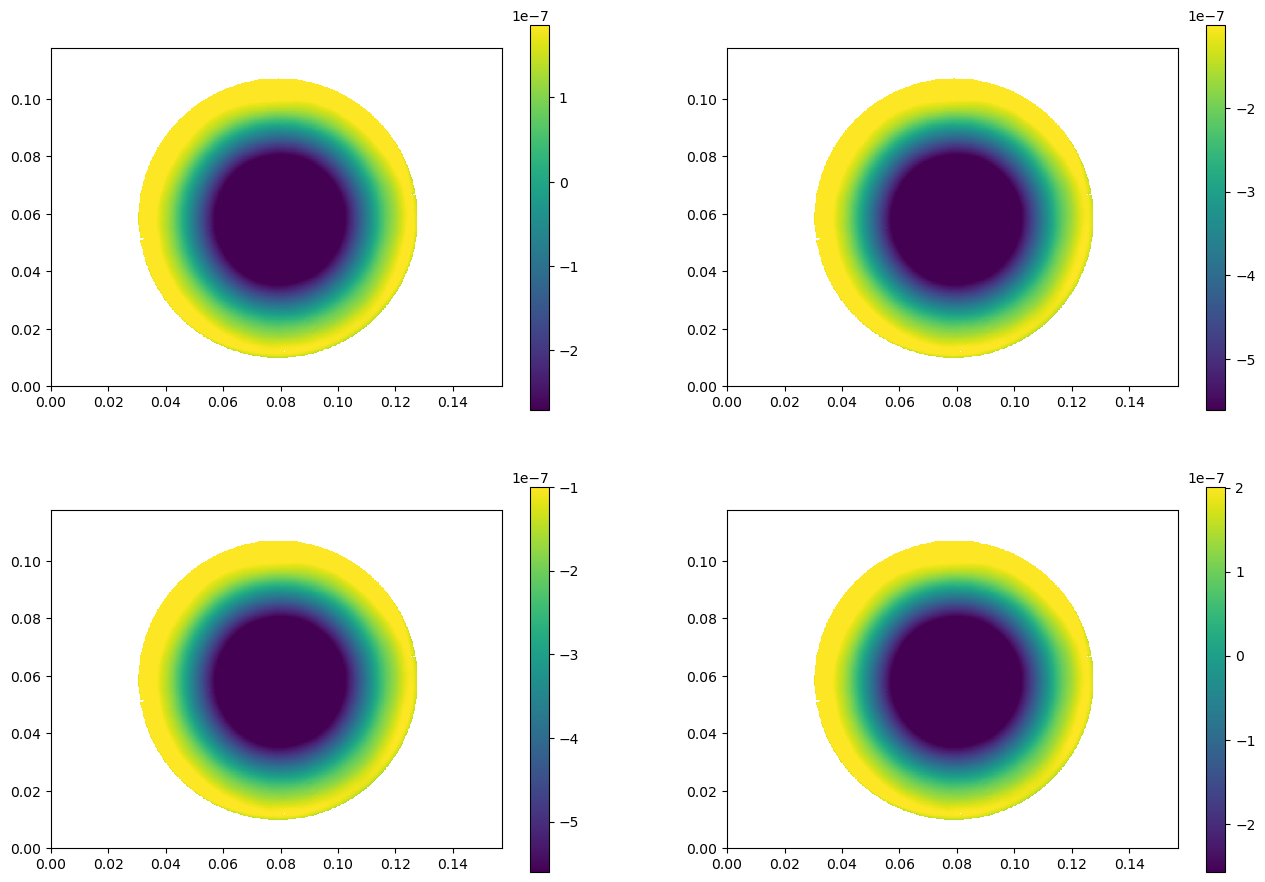

In [13]:
from pySurf.scripts.dlist import compare_images
from pySurf.data2D import plot_data
plt.close('all')
datalist = [d() for d in dl]

a = compare_images(datalist)

for aa in a:
    pass

'\n# on a grid\nfig, grid = subplot_grid(n)\nfor ax in grid:\n    try:\n        plt.sca(ax)\n        next(a)\n    except StopIteration:\n        break\n'

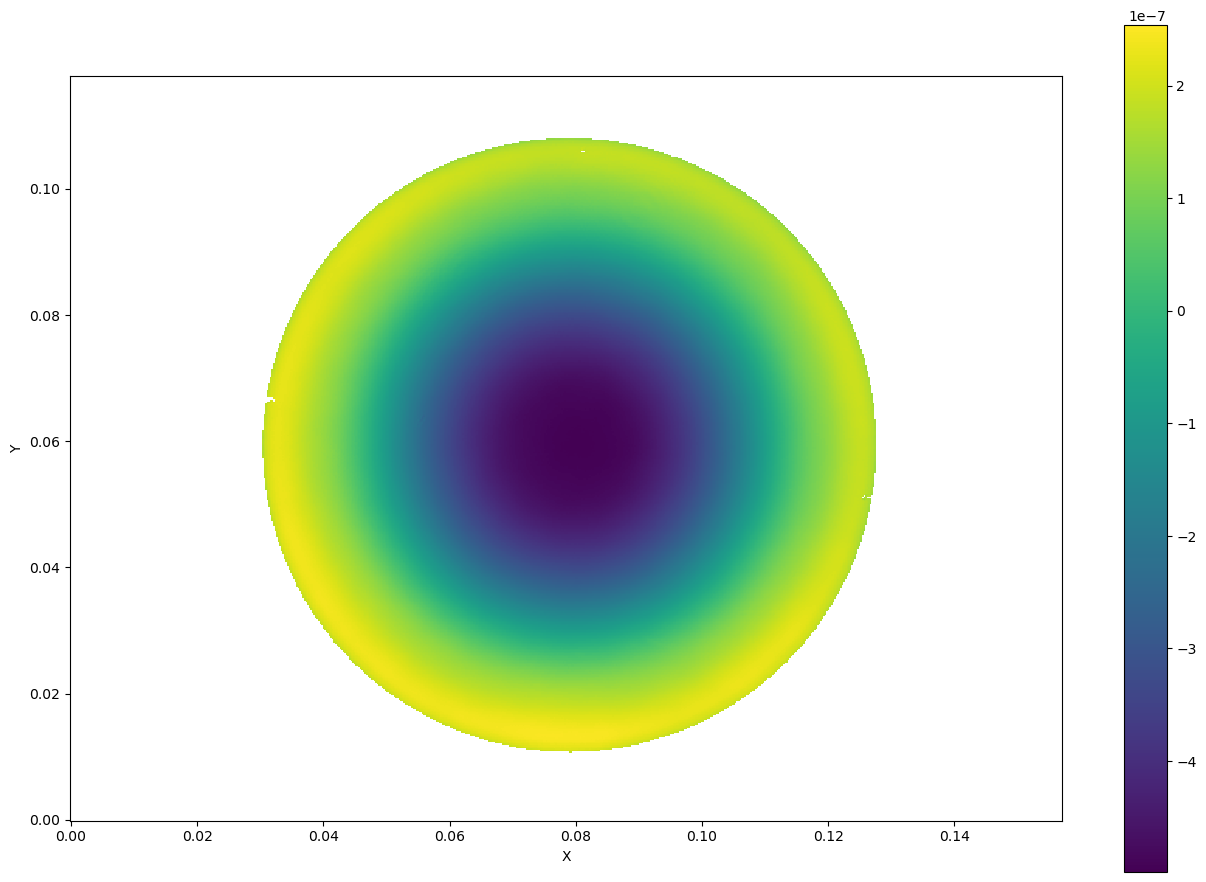

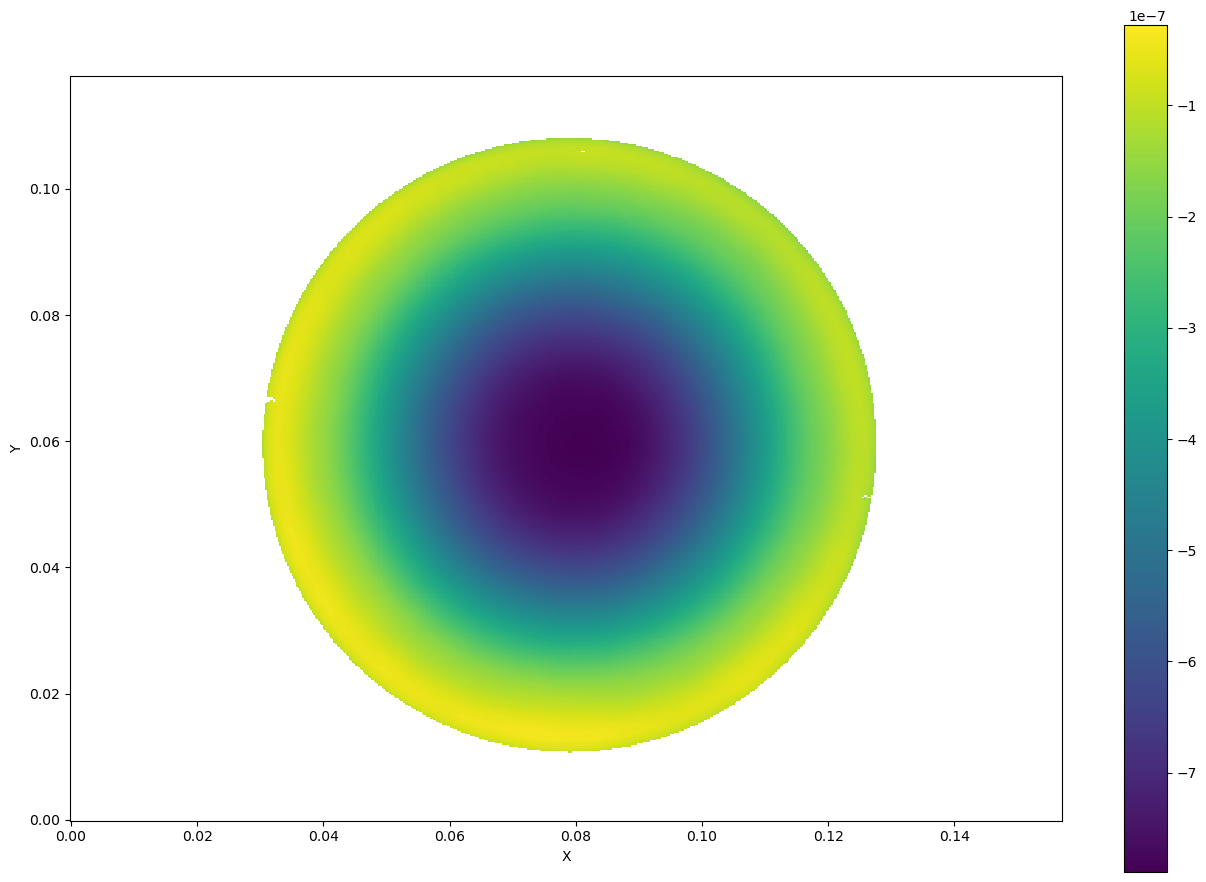

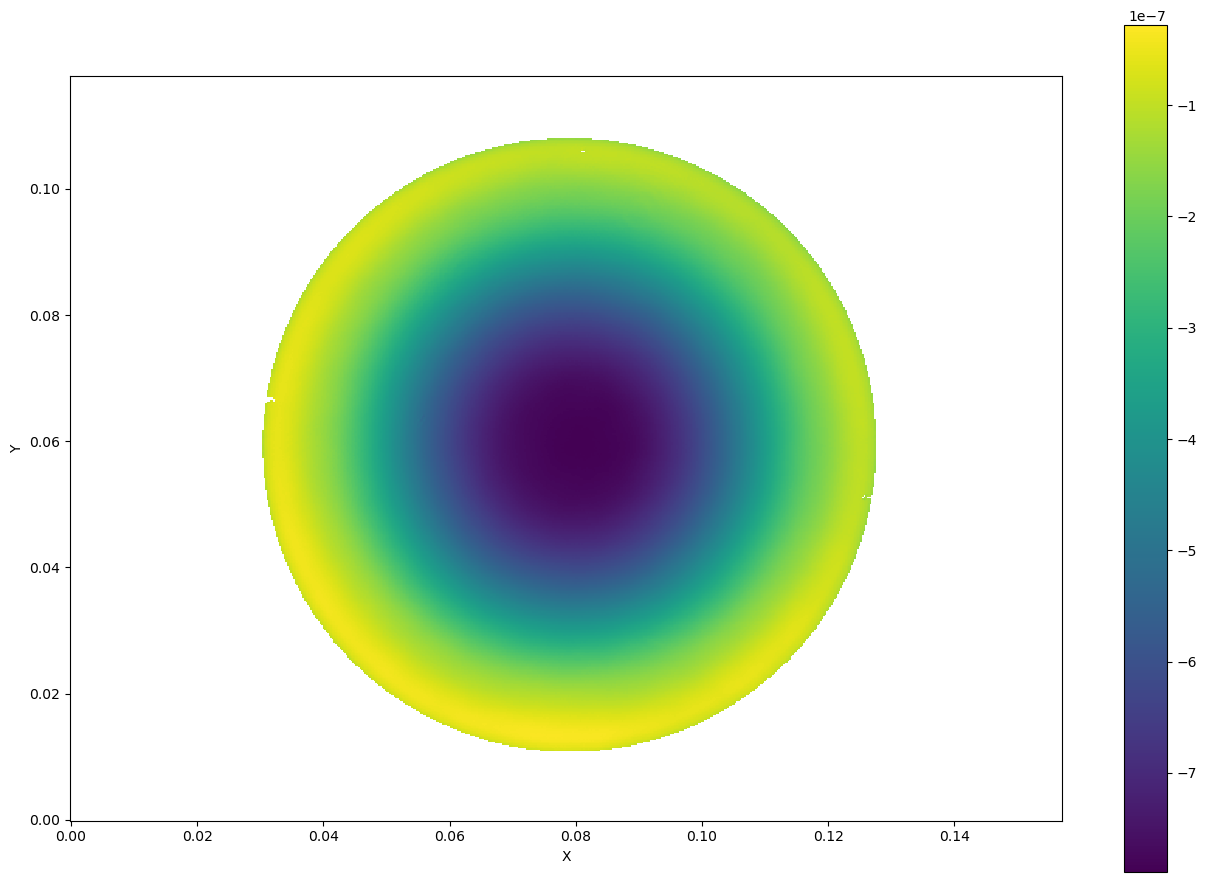

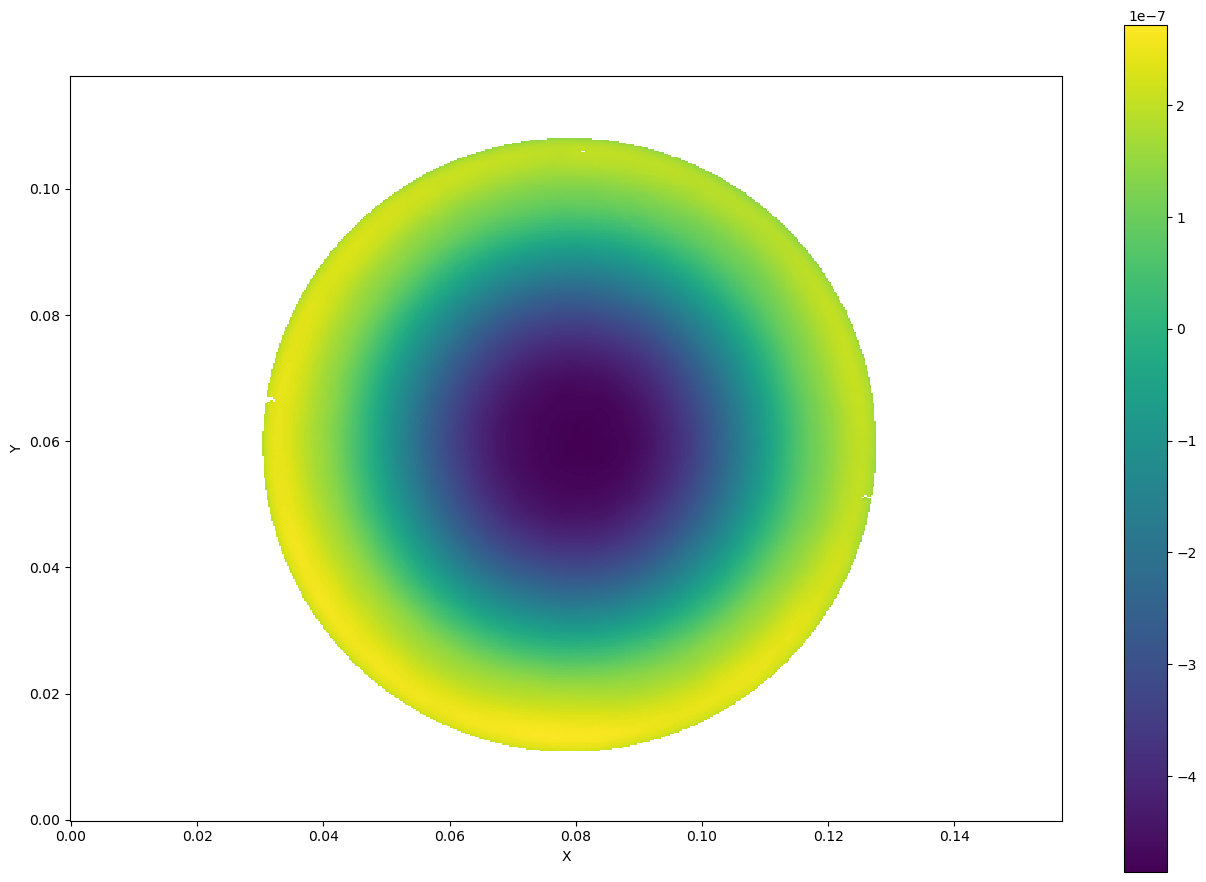

In [14]:
from pySurf.scripts.dlist import plot_datalist
from plotting.multiplots import subplot_grid


plt.close('all')

datalist = [d() for d in dl]
n = len(datalist)

a = plot_datalist(datalist)

# on separate figures
for i in range(n):
    try:
        plt.figure()
        next(a)
    except StopIteration:
        break
    
'''
# on a grid
fig, grid = subplot_grid(n)
for ax in grid:
    try:
        plt.sca(ax)
        next(a)
    except StopIteration:
        break
'''

<Figure size 1600x1100 with 0 Axes>

<Figure size 1600x1100 with 0 Axes>

<Figure size 1600x1100 with 0 Axes>

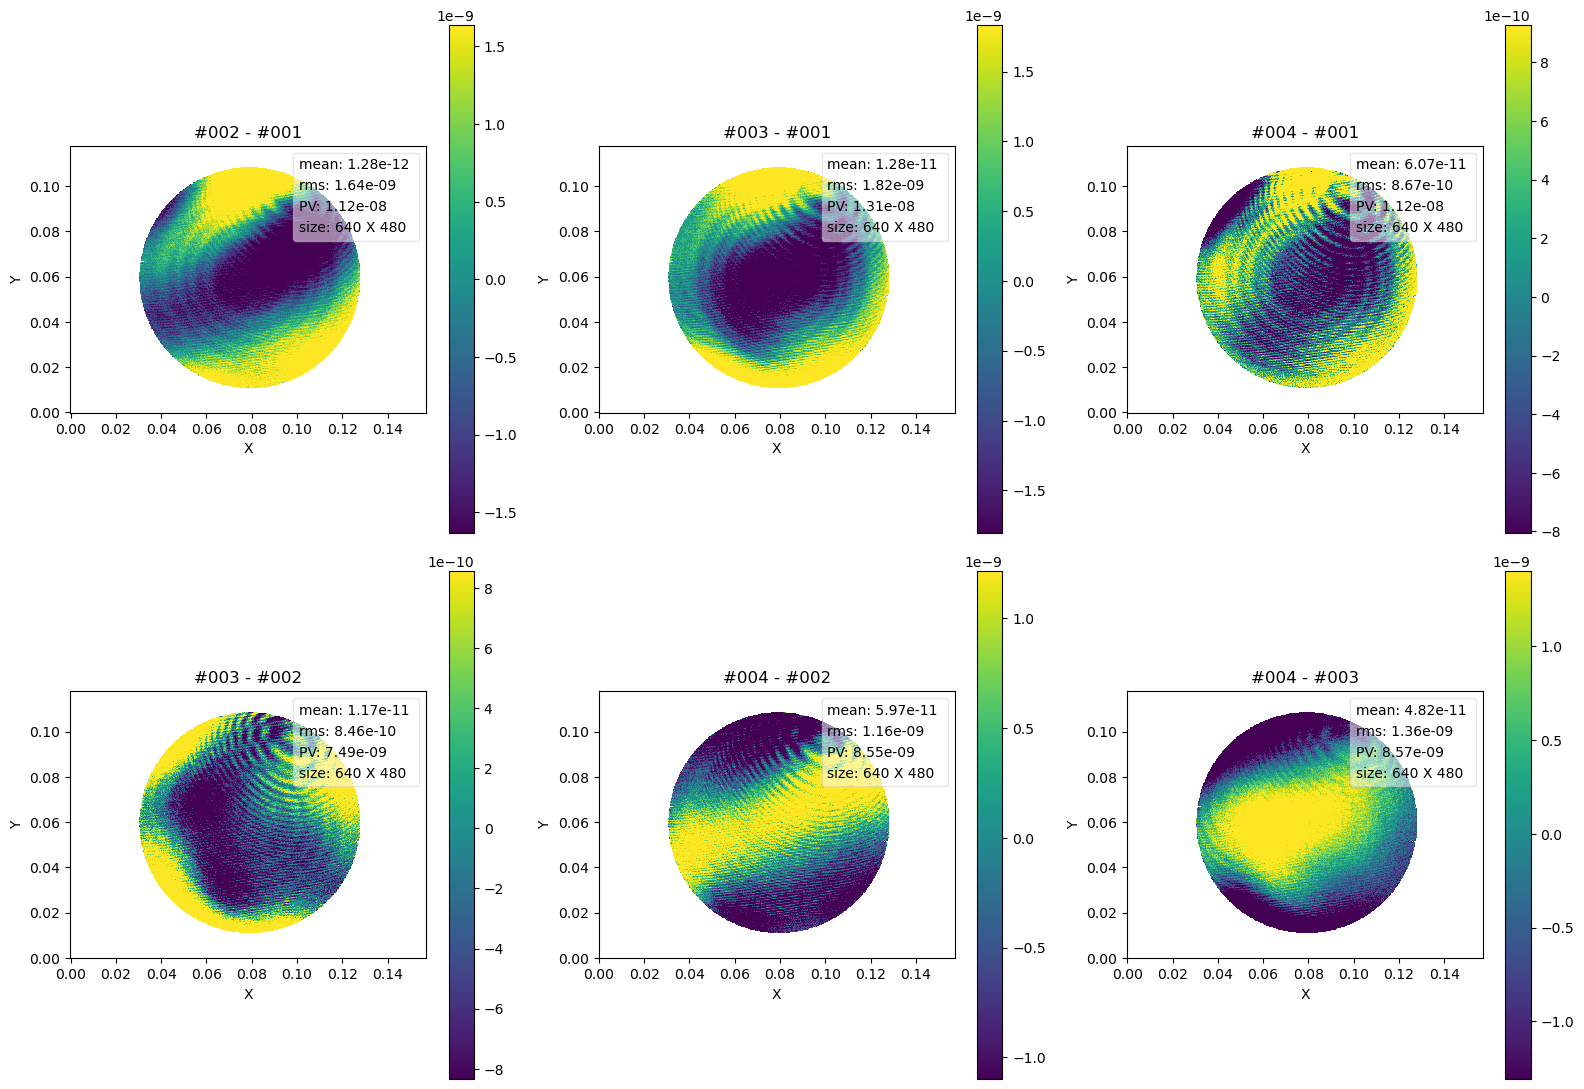

<Figure size 1600x1100 with 0 Axes>

In [16]:
maximize()
dcouples_plot(dl.level())
commonscale()
plt.tight_layout()
plt.show()

plt.figure()
plot_data_repeat(dl.level())
plt.tight_layout()
dcouples_plot(dl)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

[<.Data2D "#002 - #001" at 0x16889b27d00>,
 <.Data2D "#003 - #001" at 0x16888281190>,
 <.Data2D "#004 - #001" at 0x16888281e50>,
 <.Data2D "#003 - #002" at 0x168882622e0>,
 <.Data2D "#004 - #002" at 0x1688122f2e0>,
 <.Data2D "#004 - #003" at 0x1688360ad60>]

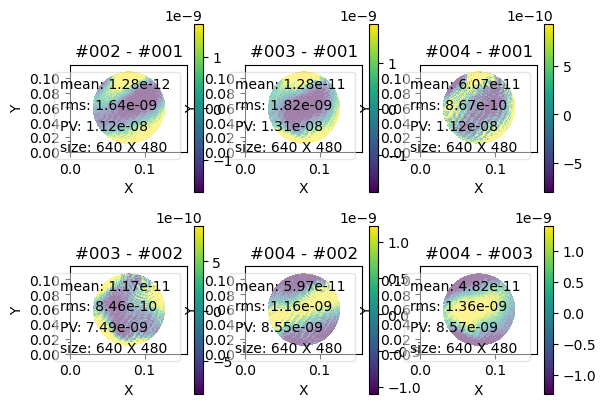

In [ ]:
dcouples_plot(dl.level())